In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
chisana = pd.read_csv('ChisanaMeteo.csv',',',header=None, 
                      names = ['date','P_cum','T_avg','T_max','T_min','T_obs','P_inc'],na_values=['-99.900000000000006'])
maycreek = pd.read_csv('MayCreekMeteo.csv',',',header=None, 
                      names = ['date','P_cum','T_avg','T_max','T_min','T_obs','P_inc'],na_values=['-99.900000000000006'])

In [3]:
%%capture
chisana['date'] = pd.to_datetime(chisana['date'], format='%d/%m/%y')
maycreek['date'] = pd.to_datetime(maycreek['date'], format='%d/%m/%y')
chisana.set_index('date')
maycreek.set_index('date')

In [4]:
event_date = np.datetime64('2015-07-31')

In [5]:
idx = np.isfinite(chisana.index) & np.isfinite(chisana.T_avg)
coefficients, residuals, _, _, _ = np.polyfit(range(len(chisana.index[idx])),chisana.T_avg[idx],1,full=True)
mse = residuals[0]/(len(chisana.index))
nrmse = np.sqrt(mse)/(chisana.T_avg.max() - chisana.T_avg.min())
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
chisana_trend = [coefficients[0]*x + coefficients[1] for x in range(0,len(chisana.index))]

Slope 5.49708197741e-05
NRMSE: 0.212562913411


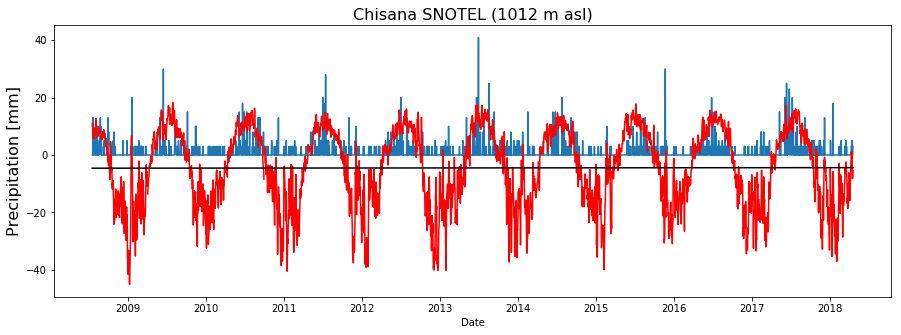

In [6]:
fig = plt.figure(figsize=(15,5))
plt.plot(chisana['date'],chisana['P_inc'])
plt.plot(chisana['date'],chisana['T_avg'],'r')
plt.plot(chisana['date'],chisana_trend,'k')
plt.xlabel('Date')
plt.ylabel('Precipitation [mm]',fontsize=16)
plt.title('Chisana SNOTEL (1012 m asl)',fontsize=16)
plt.show()

In [7]:
idx = np.isfinite(maycreek.index) & np.isfinite(maycreek.T_avg)
coefficients, residuals, _, _, _ = np.polyfit(range(len(maycreek.index[idx])),maycreek.T_avg[idx],1,full=True)
mse = residuals[0]/(len(maycreek.index))
nrmse = np.sqrt(mse)/(maycreek.T_avg.max() - maycreek.T_avg.min())
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))
maycreek_trend = [coefficients[0]*x + coefficients[1] for x in range(0,len(maycreek.index))]

Slope 0.000339453516202
NRMSE: 0.198744714161


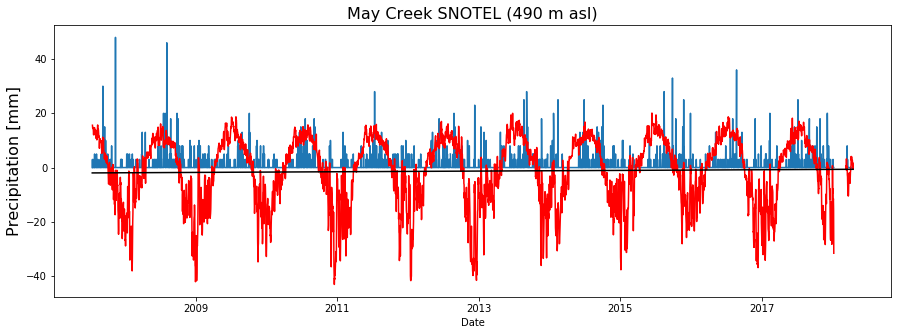

In [8]:
fig = plt.figure(figsize=(15,5))
plt.plot(maycreek['date'],maycreek['P_inc'])
plt.plot(maycreek['date'],maycreek['T_avg'],'r')
plt.plot(maycreek['date'],maycreek_trend,'k')
plt.xlabel('Date')
plt.ylabel('Precipitation [mm]',fontsize=16)
plt.title('May Creek SNOTEL (490 m asl)',fontsize=16)
plt.show()

In [127]:
chisana2015 = chisana.loc[(chisana['date'] > '2015-05-01') & (chisana['date'] < '2015-10-31')]
maycreek2015 = maycreek.loc[(maycreek['date'] > '2015-05-01') & (maycreek['date'] < '2015-10-31')]

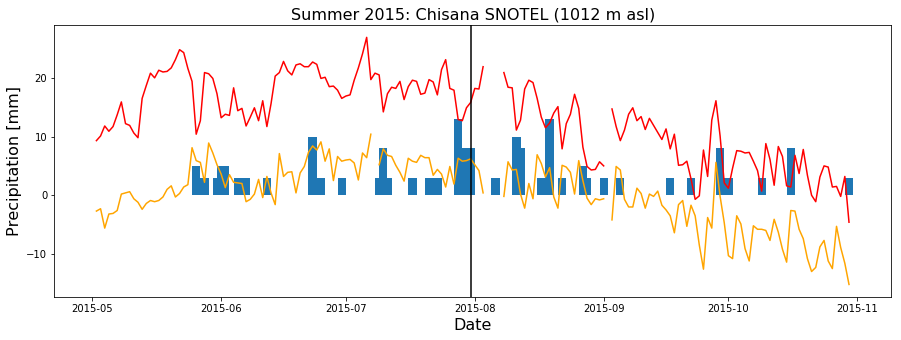

In [134]:
fig = plt.figure(figsize=(15,5))
plt.bar(chisana2015.date,chisana2015.P_inc,width=2)
#plt.plot(chisana2015.date,chisana2015.T_avg,'r')
plt.plot(chisana2015.date,chisana2015.T_max,'r')
plt.plot(chisana2015.date,chisana2015.T_min,'orange')
#plt.plot(chisana2015['date'],chisana2015['P_cum'])
plt.axvline(event_date,color='black')
plt.xlabel('Date',fontsize=16)
plt.ylabel('Precipitation [mm]',fontsize=16)
plt.title('Summer 2015: Chisana SNOTEL (1012 m asl)',fontsize=16)
plt.show()

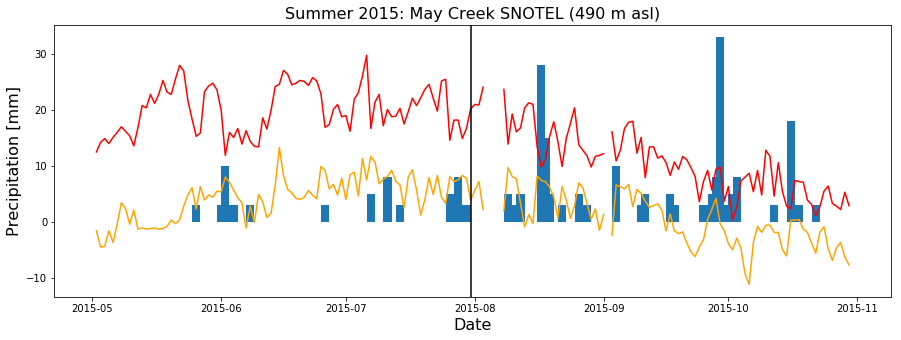

In [129]:
fig = plt.figure(figsize=(15,5))
plt.bar(maycreek2015.date,maycreek2015.P_inc,width=2)
#plt.plot(maycreek2015['date'],maycreek2015['P_cum'])
plt.plot(maycreek2015.date,maycreek2015.T_max,'r')
plt.plot(maycreek2015.date,maycreek2015.T_min,'orange')
plt.axvline(event_date,color='black')
plt.xlabel('Date',fontsize=16)
plt.ylabel('Precipitation [mm]',fontsize=16)
plt.title('Summer 2015: May Creek SNOTEL (490 m asl)',fontsize=16)
plt.show()

In [12]:
profile_2014 = pd.read_csv('2014_bed_profile.txt','\t',header=None,
                           names=['hor_dist','x','y','elevation'])
profile_2016 = pd.read_csv('2016_bed_profile.txt','\t',header=None,
                           names=['hor_dist','x','y','elevation'])

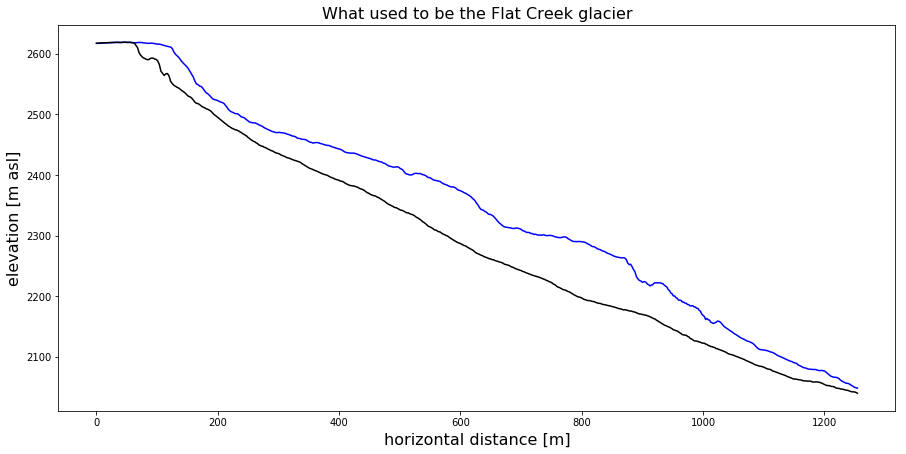

In [13]:
plt.figure(figsize=(15,10))
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(profile_2014.hor_dist,profile_2014.elevation,'b')
plt.plot(profile_2016.hor_dist,profile_2016.elevation,'k')
plt.xlabel('horizontal distance [m]',fontsize=16)
plt.ylabel('elevation [m asl]',fontsize=16)
plt.title('What used to be the Flat Creek glacier',fontsize=16)
plt.show()

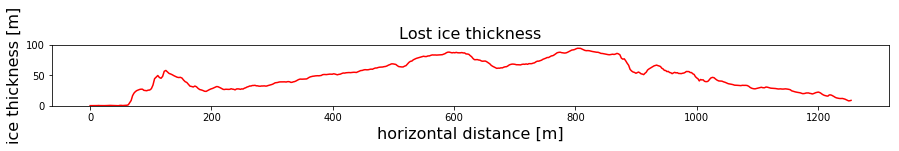

In [14]:
plt.figure(figsize=(15,10))
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(profile_2014['hor_dist'],profile_2014['elevation']-profile_2016['elevation'],'r')
plt.xlabel('horizontal distance [m]',fontsize=16)
plt.ylabel('ice thickness [m]',fontsize=16)
plt.ylim([0,100])
plt.title('Lost ice thickness',fontsize=16)
plt.show()


### What percentage of ice can we melt if all the potential energy is turned into heat?

Assumptions:
Average starting height is at 2300m asl, ice density is 917 km/m3

In [15]:
initial_volume = 22e6 # m3
rho_ice = 917 # kg/m3
rho_water = 1000 # kg/m3
H = 2300-1026 #m
g = 9.81 #m/s2
E_pot = initial_volume*rho_ice*H*g #joules
lhf = 333550 # kJ/kg
available_h2o = E_pot/lhf # kg of water
volume_h2o = available_h2o/rho_water # m3
ice_melt = (volume_h2o/initial_volume)*100
print('ice melt: '+ str(ice_melt) + '%')

ice melt: 3.43594992655%


### Constraints on the velocity of the glahar

In [16]:
se_height = 1457 - 1395 # super-elevation height in m
width = 848 # m
beta = np.arctan(float(se_height)/width)
R = 975#m
u_se = np.sqrt(R*g*np.sin(beta))
print('velocity from super-elevation: ' + str(u_se) +'m/s')

velocity from super-elevation: 26.4092392577m/s


In [17]:
hill_height = 1493 - 1384
u_hill = np.sqrt(2*g*hill_height)
print('velocity from over running hill: ' + str(u_hill) +'m/s')

velocity from over running hill: 46.2447834896m/s


### Calculate liberated water as avalanche progresses

In [18]:
full_profile = pd.read_csv('full_profile_from_mosaic.txt','\t',header=None,
                           names=['hor_dist','x','y','elevation'])


In [19]:
starting_height = 2300
idx = (np.abs(full_profile.elevation-starting_height)).idxmin() 
elevation = full_profile.elevation[idx:]
ice_volume = np.zeros(len(elevation))
dz = np.zeros(len(elevation)-1)
potential_energy= np.zeros(len(elevation)-1)
water_availability = np.zeros(len(elevation)-1)
water_depth = np.zeros(len(elevation)-1)
water_volume = np.zeros(len(elevation)-1)
ice_volume[0] = initial_volume
dx_mean = np.mean(np.diff(full_profile.hor_dist))
average_width = 770.455

for i in range(0,len(elevation)-1):
    dz[i] = full_profile.elevation[i]-full_profile.elevation[i+1]
    if dz[i] < 0:
        ice_volume[i+1] = ice_volume[i]
    else:
        potential_energy[i] = ice_volume[i]*rho_ice*dz[i]*g #joules
        water_availability[i] = potential_energy[i]/lhf
        water_volume[i] = water_availability[i]/rho_water # m3
        water_depth[i] = water_volume[i]/(average_width*dx_mean)
        ice_volume[i+1] = ice_volume[i]-water_volume[i]

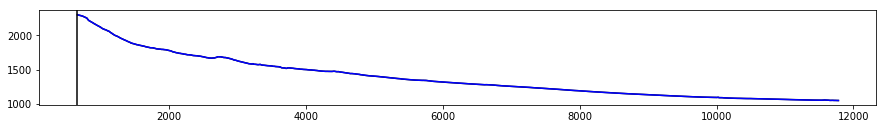

In [20]:
plt.figure(figsize=(15,10))
plt.plot(full_profile.hor_dist[idx:-1],full_profile.elevation[idx:-1],'k')
plt.plot(full_profile.hor_dist[idx:-1],(full_profile.elevation[idx:-1]+water_depth),'b')
plt.gca().set_aspect('equal', adjustable='box')
plt.axvline(full_profile.hor_dist[idx],color='black')
plt.show()

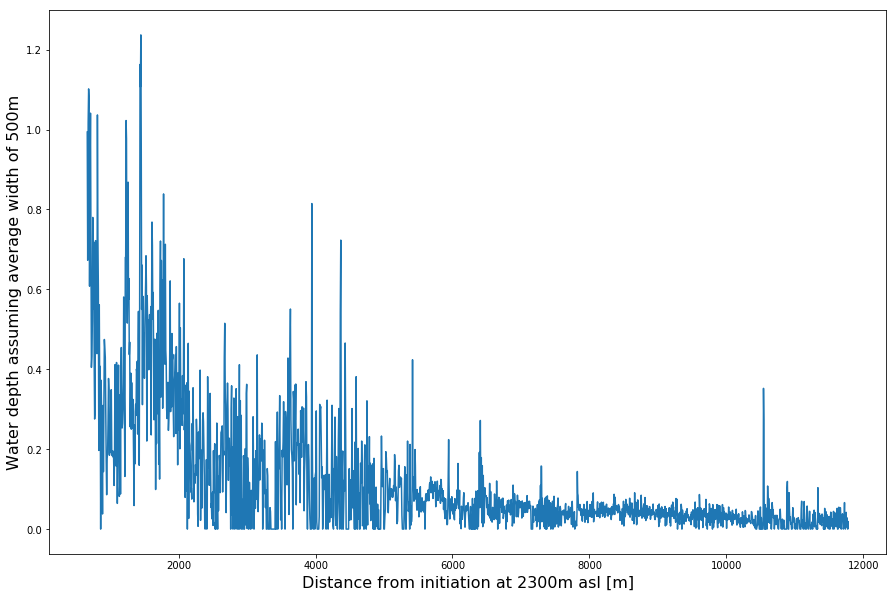

In [21]:
plt.figure(figsize=(15,10))
plt.plot(full_profile.hor_dist[idx:-1],water_depth)
plt.xlabel('Distance from initiation at 2300m asl [m]',fontsize=16)
plt.ylabel('Water depth assuming average width of 500m',fontsize=16)
plt.show()

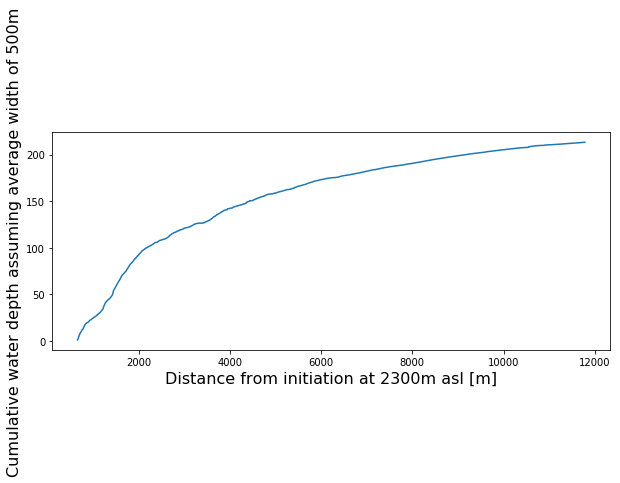

In [24]:
plt.figure(figsize=(10,4))
plt.plot(full_profile.hor_dist[idx:-1],np.cumsum(water_depth))
plt.xlabel('Distance from initiation at 2300m asl [m]',fontsize=16)
plt.ylabel('Cumulative water depth assuming average width of 500m',fontsize=16)
plt.show()

In [25]:
runout_area = 8620363 #m3
average_depth= np.sum(water_volume)/runout_area
print('average water depth: ' + str(average_depth)+'m')

average water depth: 0.111667477789m


### Force Balance

In [110]:
ice_thickness = profile_2014.elevation - profile_2016.elevation
ice_thickness[ice_thickness<0] = 0
theta = np.radians(24)
tensile_strength = 2000 #pascals
driving_stress = rho_ice*g*ice_thickness*np.sin(theta) #stress in force per area [Pa]
#resisting_stress = mu * (rho_ice*ice_thickness*np.cos(theta)-water_pressure)+(c(2*H*L+W*H)/W*L)
resisting_stress = ice_thickness*tensile_strength
width = 300*(1-np.exp(-profile_2014.hor_dist[::-1]/200))
width[0]=width[1]

In [115]:
resisting_force = np.zeros(len(ice_thickness))
driving_force = np.zeros(len(ice_thickness))
for l in xrange(0,len(ice_thickness)-1):
    resisting_force[l] = np.sum(ice_thickness[l:]*width[l])*tensile_strength
    driving_force[l] = (rho_ice*g*(np.sum(ice_thickness[l:])*(profile_2014.hor_dist[len(ice_thickness)-1]-
                            profile_2014.hor_dist[l]))*width[l]*np.cos(theta))
    

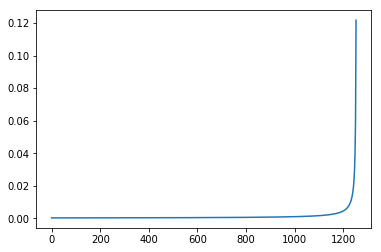

In [116]:
FS = resisting_force[:-1]/driving_force[:-1]
plt.plot(profile_2014.hor_dist[:-1],FS)
plt.show()